
**Solar Yield Prediction Model**


This project applies data science techniques to predict solar energy yield, supporting Sustainable Development Goal 7: Affordable and Clean Energy. The workflow involves analyzing, cleaning, and arranging solar and weather data, followed by feature selection to identify critical factors influencing solar yield. Next, data visualization is used to understand trends and patterns. Finally, various machine learning algorithms are applied to develop a model that provides the most accurate solar yield predictions, optimizing solar energy production for efficient and sustainable energy use.

**Author:** Somya Vats  
**Date:** 1/10/2024


**STEP 1 DATA ACQUIRING**


1.   Dataset has been taken from kaggle and uploaded into google drive as a ".csv" file
2.   Drive is imported and so is the data.
3.   Then, just to check the success of these steps, few content is printed.



In [1]:
#IMPORTING THE DATASET FROM OUR GOOGLE DRIVE
import pandas as pd
import os


from google.colab import drive
drive.mount('/content/drive')

weather_data = pd.read_csv('/content/drive/MyDrive/assignment/data/Plant_1_Weather_Sensor_Data.csv')
generation_data = pd.read_csv('/content/drive/MyDrive/assignment/data/Plant_1_Generation_Data.csv')


print("Columns in weather data:", weather_data.columns)
print("Columns in generation data:", generation_data.columns)

Mounted at /content/drive
Columns in weather data: Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')
Columns in generation data: Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')


**STEP 2 VISUALIZATION OF CURRENT DATA'S TREND AND FEATURES**

1.   Checking the distribution of the features of the data
2.   Then, checking the time series trends, as later, we merge both our dataset based off the "Date_time" column




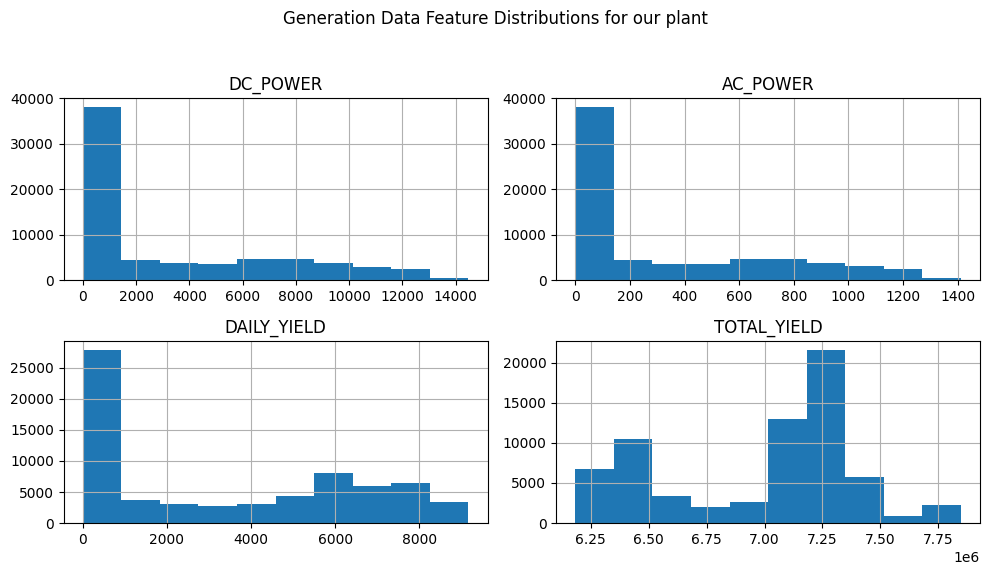

In [2]:
#ANALYSIS OF OUR DATASET AND ITS KEY FEATURES AND THEIR DISTRIBUTION
import matplotlib.pyplot as plt

generation_data[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(10, 6))
plt.suptitle("Generation Data Feature Distributions for our plant")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


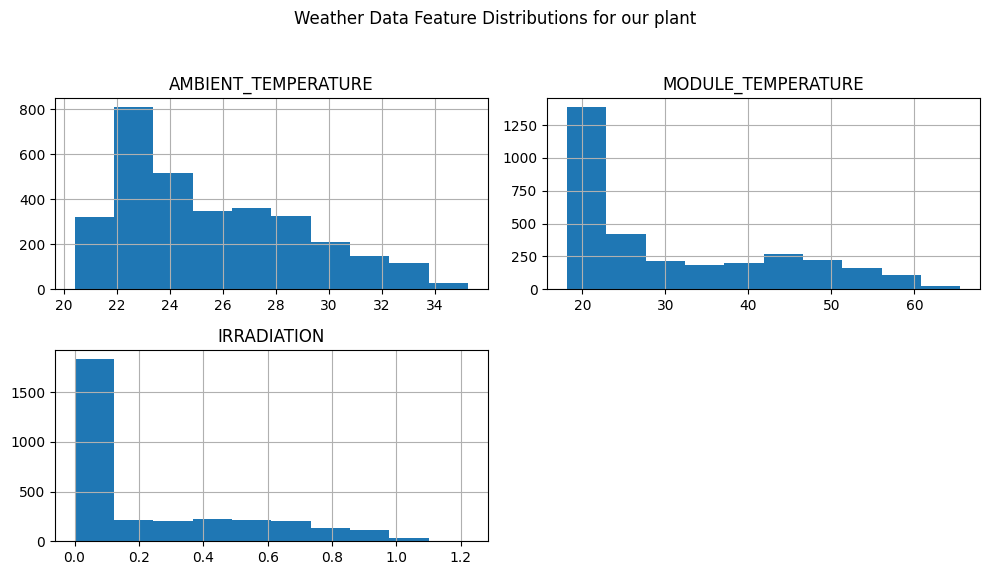

In [3]:
weather_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(10, 6))
plt.suptitle("Weather Data Feature Distributions for our plant")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

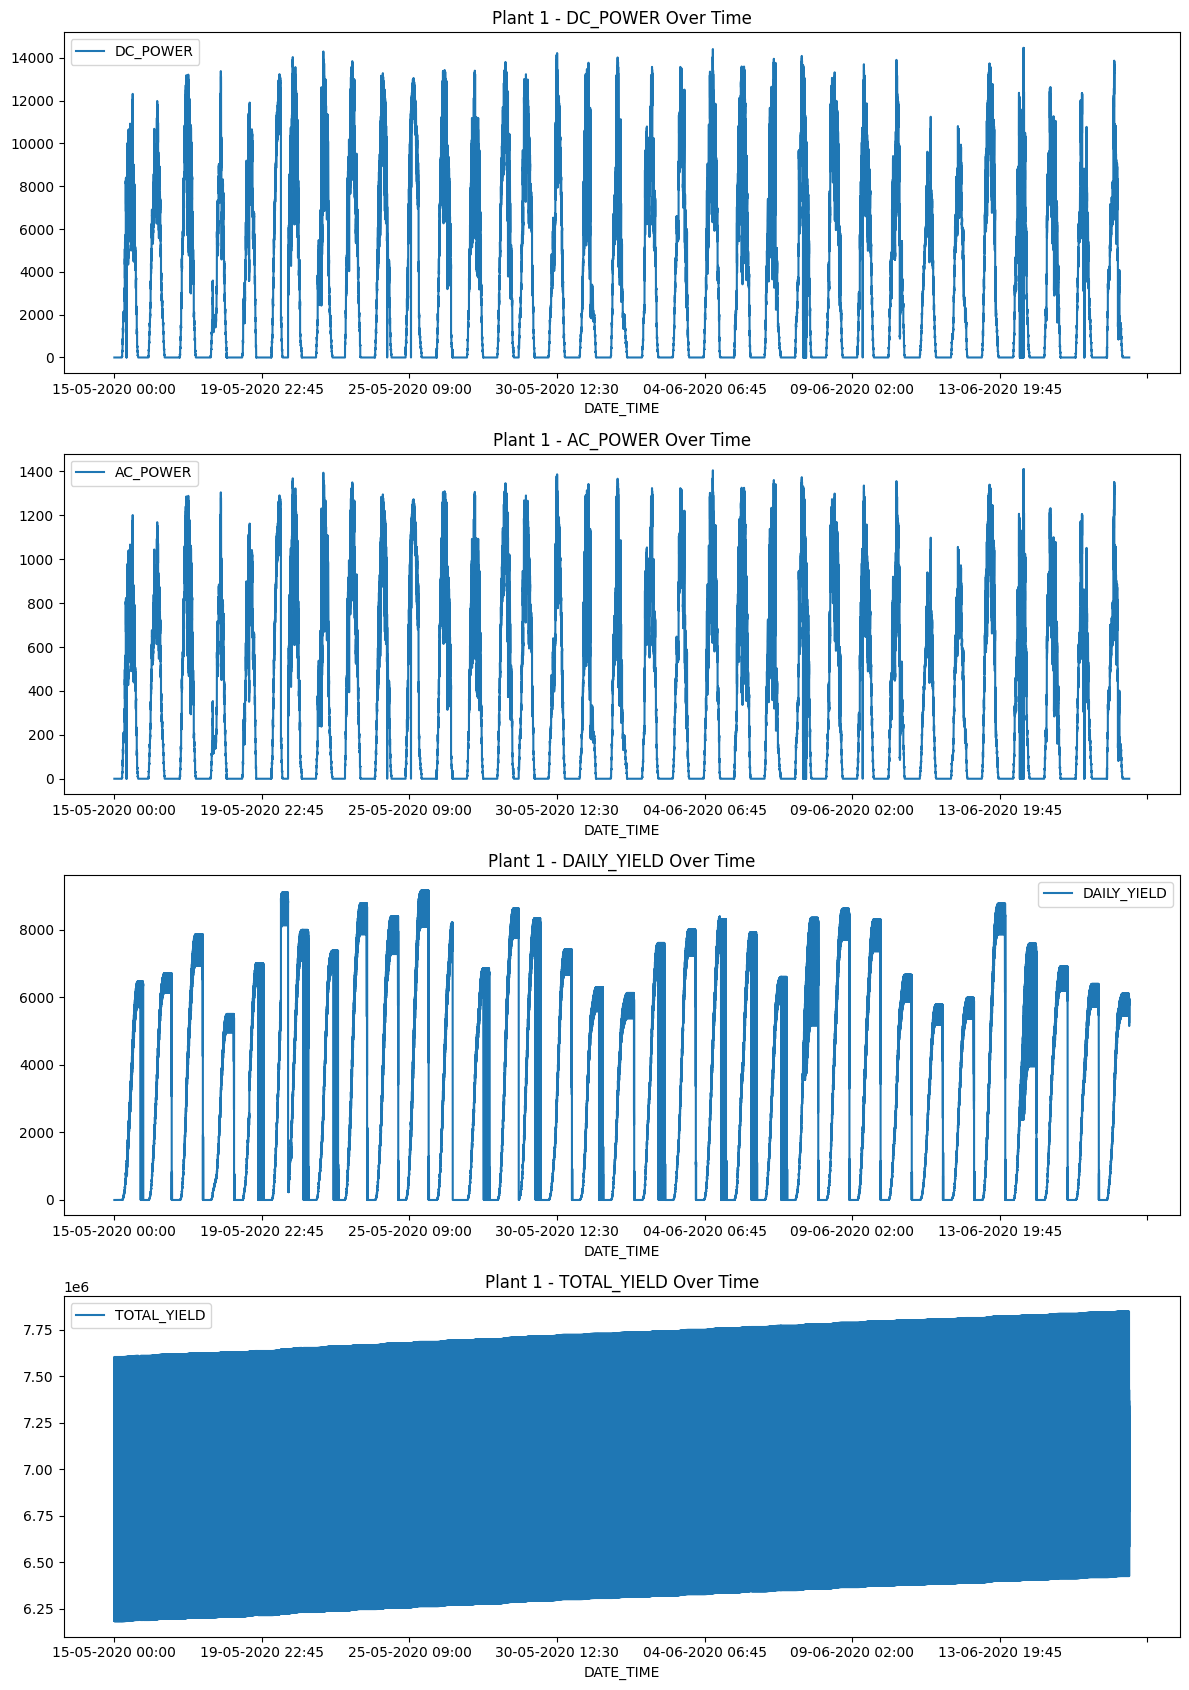

In [6]:
#NOW, VISUALIZING THE TIME SERIES OF OUR FEATURES

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 17))
generation_data.plot(x='DATE_TIME', y='DC_POWER', ax=axes[0], title="Plant 1 - DC_POWER Over Time")
generation_data.plot(x='DATE_TIME', y='AC_POWER', ax=axes[1], title="Plant 1 - AC_POWER Over Time")
generation_data.plot(x='DATE_TIME', y='DAILY_YIELD', ax=axes[2], title="Plant 1 - DAILY_YIELD Over Time")
generation_data.plot(x='DATE_TIME', y='TOTAL_YIELD', ax=axes[3], title="Plant 1 - TOTAL_YIELD Over Time")
plt.tight_layout()
plt.show()


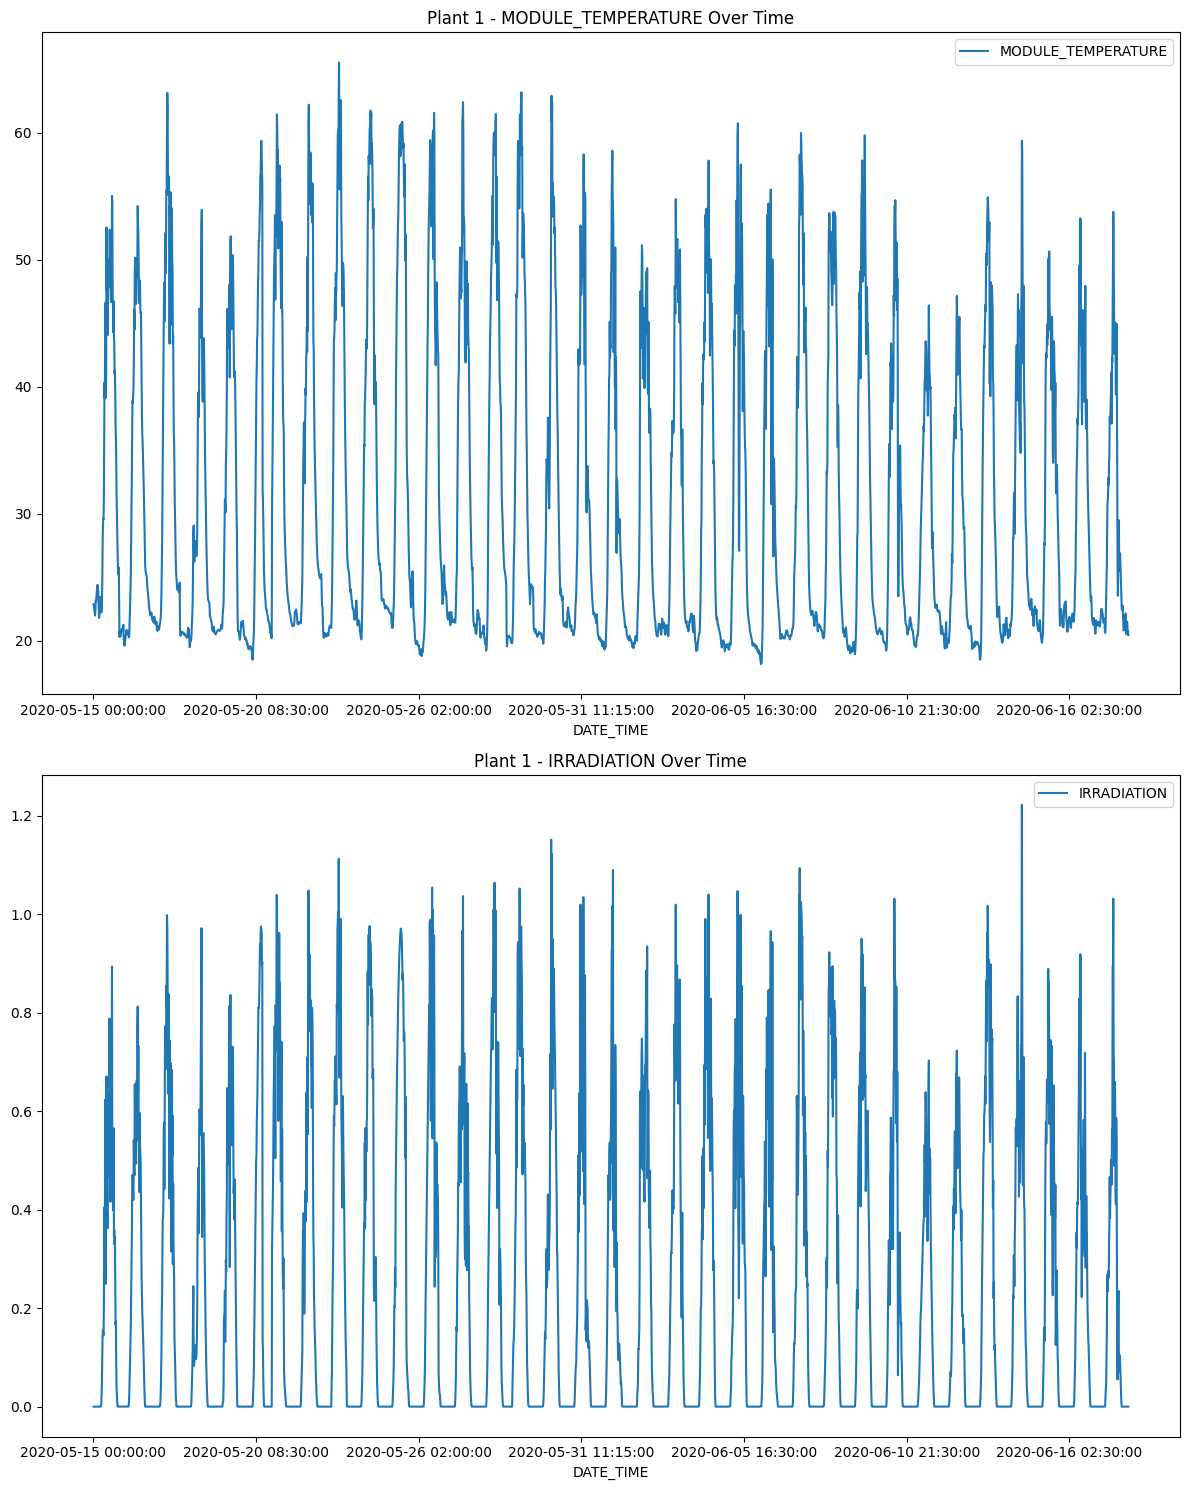

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 15))
weather_data.plot(x='DATE_TIME', y='MODULE_TEMPERATURE', ax=axes[0], title="Plant 1 - MODULE_TEMPERATURE Over Time")
weather_data.plot(x='DATE_TIME', y='IRRADIATION', ax=axes[1], title="Plant 1 - IRRADIATION Over Time")
plt.tight_layout()
plt.show()

**STEP 3. DATA PROCESSING**


1.   We change the format of the "DATE_TIME" column into the datetime data format in python
2.   Then, we check the data types and missing values for both the datasets
3.   Since generation data is huge, we condense it
4.   Then, on the basis of "DATE_TIME" and "PLANT_ID", merge both the datasets as the prediction will be made on basis of combined features
4.   We condense "merged_data" into a sub-dataset as the initial one was very large size
5.   We distribute the train and validation splits over the data
6.   We check if we require SMOTE application for our data
7.   We further check the class distribution for imbalances, so to further check the applicabilty of SMOGN, etc



In [9]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])



<ipython-input-9-ef529c81f3f7>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'])


In [10]:
import pandas as pd
missing_values = pd.DataFrame({
    'Weather Data Missing values': weather_data.isnull().sum(),
    'Generation Data Missing values': generation_data.isnull().sum()
})

data_types = pd.DataFrame({
    'Weather Data Types': weather_data.dtypes,
    'Generation Data Types': generation_data.dtypes
})

print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)


Missing Values:
                      Weather Data Missing values  \
AC_POWER                                     NaN   
AMBIENT_TEMPERATURE                          0.0   
DAILY_YIELD                                  NaN   
DATE_TIME                                    0.0   
DC_POWER                                     NaN   
IRRADIATION                                  0.0   
MODULE_TEMPERATURE                           0.0   
PLANT_ID                                     0.0   
SOURCE_KEY                                   0.0   
TOTAL_YIELD                                  NaN   

                     Generation Data Missing values  
AC_POWER                                        0.0  
AMBIENT_TEMPERATURE                             NaN  
DAILY_YIELD                                     0.0  
DATE_TIME                                       0.0  
DC_POWER                                        0.0  
IRRADIATION                                     NaN  
MODULE_TEMPERATURE              

In [11]:
condensed_gen_data = generation_data.sample(n=3000)
merged_data = pd.merge(condensed_gen_data, weather_data, on="PLANT_ID", how="inner")

print("Columns in merged data:", merged_data.columns)
print()
print()
print("First few rows of merged data:")
print(merged_data.head(2))

Columns in merged data: Index(['DATE_TIME_x', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'DATE_TIME_y', 'SOURCE_KEY_y',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


First few rows of merged data:
          DATE_TIME_x  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  \
0 2020-06-15 15:15:00   4135001  bvBOhCH3iADSZry    5817.5    570.05   
1 2020-06-15 15:15:00   4135001  bvBOhCH3iADSZry    5817.5    570.05   

   DAILY_YIELD  TOTAL_YIELD         DATE_TIME_y     SOURCE_KEY_y  \
0      5394.75   6526994.75 2020-05-15 00:00:00  HmiyD2TTLFNqkNe   
1      5394.75   6526994.75 2020-05-15 00:15:00  HmiyD2TTLFNqkNe   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            25.184316           22.857507          0.0  
1            25.084589           22.761668          0.0  


In [12]:
total_rows = merged_data.shape[0]
print("Total rows in the merged data:", total_rows)


Total rows in the merged data: 9546000


In [13]:
sampled_data = merged_data.sample(n=5000, random_state=42)

sampled_rows = sampled_data.shape[0]
print("Total rows in the sampled data:", sampled_rows)

# Display dataset shape
print("Initial Data Shape:", sampled_data.shape)
print("Current Class Distribution :\n", sampled_data['TOTAL_YIELD'].value_counts())

Total rows in the sampled data: 5000
Initial Data Shape: (5000, 12)
Current Class Distribution :
 TOTAL_YIELD
6484342.000    19
6463239.000    15
7175293.000    14
6679062.000    14
6967970.000    14
               ..
7009500.429     1
7221016.125     1
7178857.750     1
7172021.000     1
7165435.000     1
Name: count, Length: 1906, dtype: int64


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = sampled_data.drop(['DATE_TIME_x', 'PLANT_ID', 'SOURCE_KEY_x', 'TOTAL_YIELD'], axis=1)  # Features that are not required
y = sampled_data['TOTAL_YIELD']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape, "Validation Set Shape:", X_val.shape)
print("Training Set Class Distribution:\n", y_train.value_counts())
print("Validation Set Class Distribution:\n", y_val.value_counts())



Training Set Shape: (4000, 8) Validation Set Shape: (1000, 8)
Training Set Class Distribution:
 TOTAL_YIELD
6484342.000    17
6463239.000    15
6679062.000    12
6967970.000    12
6864650.000    12
               ..
7192499.286     1
6389596.286     1
7223068.625     1
7262906.286     1
6330278.000     1
Name: count, Length: 1736, dtype: int64
Validation Set Class Distribution:
 TOTAL_YIELD
7022718.000    6
7098111.000    5
7102189.000    4
6483987.143    4
7344704.000    4
              ..
6372194.714    1
6371833.000    1
7392988.000    1
6511817.125    1
7381381.286    1
Name: count, Length: 779, dtype: int64


In [15]:
from imblearn.over_sampling import SMOTE
import pandas as pd

y_train = pd.Series(y_train)
smote = SMOTE(random_state=42)


if y_train.nunique() < 10:
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print("Original training set shape:", X_train.shape, y_train.shape)
    print("Resampled training set shape:", X_train_resampled.shape, y_train_resampled.shape)

    print("Resampled class distribution:\n", y_train_resampled.value_counts())
else:
    print("As the target variable consists of continuous values, SMOTE is not needed for balancing.")


As the target variable consists of continuous values, SMOTE is not needed for balancing.


Training Target Variable Distribution:
 count    4.000000e+03
mean     6.981471e+06
std      4.123669e+05
min      6.183645e+06
25%      6.514911e+06
50%      7.145443e+06
75%      7.264741e+06
max      7.846821e+06
Name: TOTAL_YIELD, dtype: float64


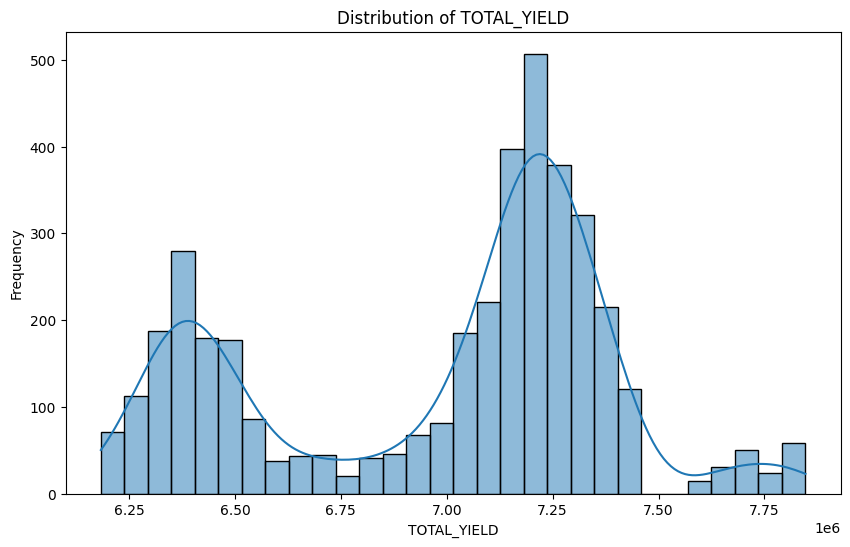

In [16]:
print("Training Target Variable Distribution:\n", y_train.describe())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True)  # Histogram with Kernel Density Estimate
plt.title("Distribution of TOTAL_YIELD")
plt.xlabel("TOTAL_YIELD")
plt.ylabel("Frequency")
plt.show()


**STEP 4. MODELLING**


1.   Standarlizing the data
2.   Defining the following models: LinearRegression
, RandomForestRegressor
, SVR
, DecisionTreeRegressor
, KNeighborsRegressor
3.    Checking the residual score, none of the algorithms give perfect accuracy. Hence, redefining models with the algorithms: DecisionTreeRegressor , RandomForestRegressor
, GradientBoostingRegressor
, XGBRegressor
, SVR
, KNeighborsRegressor




In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = sampled_data.drop(['DATE_TIME_x', 'PLANT_ID', 'SOURCE_KEY_x', 'TOTAL_YIELD'], axis=1)  # Features
y = sampled_data['TOTAL_YIELD']

#data split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()

# Check and drop any non-numeric columns from X_train before scaling
X_train_numeric = X_train.select_dtypes(include=[float, int])
X_val_numeric = X_val.select_dtypes(include=[float, int])


X_train_scaled = scaler.fit_transform(X_train_numeric)
X_val_scaled = scaler.transform(X_val_numeric)

# Converting our scaled data back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val_numeric.columns)



In [18]:
# Check the shapes of the scaled DataFrames
print("Shape of scaled training set:", X_train_scaled_df.shape)
print("Shape of scaled validation set:", X_val_scaled_df.shape)


Shape of scaled training set: (4000, 6)
Shape of scaled validation set: (1000, 6)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Model Definitions:
models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))


In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Using K-Fold Cross-Validation for model evaluation
results = []
names = []
metrics = {
    'MSE': [], 'MAE': [], 'R2': []
}
best_model = None
best_r2 = -np.inf  # Initialize with negative infinity for R²

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for name, model in models:
    # Compute cross-validated scores
    mse_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='neg_mean_squared_error')
    mae_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='neg_mean_absolute_error')
    r2_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='r2')

    results.append((mse_cv, mae_cv, r2_cv))
    names.append(name)

    # Fit model and make predictions on the validation set
    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_val_scaled_df)

    # Calculate metrics
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"\n{name}:")
    print(f"  MSE = {mse:.4f}")
    print(f"  MAE = {mae:.4f}")
    print(f"  R² = {r2:.4f}")

    # Store metrics
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['R2'].append(r2)

    # Identify the best model based on R²
    if r2 > best_r2:
        best_r2 = r2
        best_model = model



LR:
  MSE = 163829080409.7341
  MAE = 347635.1650
  R² = 0.0018

DTR:
  MSE = 223115766127.5893
  MAE = 311008.1498
  R² = -0.3594

RFR:
  MSE = 161379233790.4542
  MAE = 325749.5754
  R² = 0.0168

SVR:
  MSE = 186960641666.7153
  MAE = 318213.7348
  R² = -0.1391

KNN:
  MSE = 202609509610.2074
  MAE = 370135.9870
  R² = -0.2344


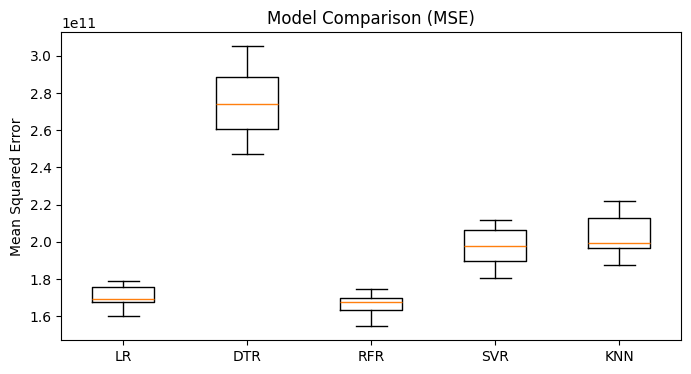

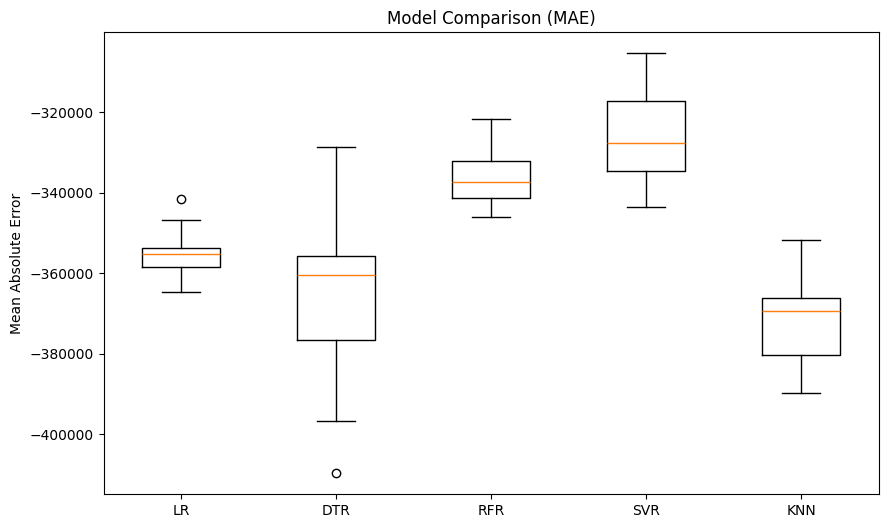

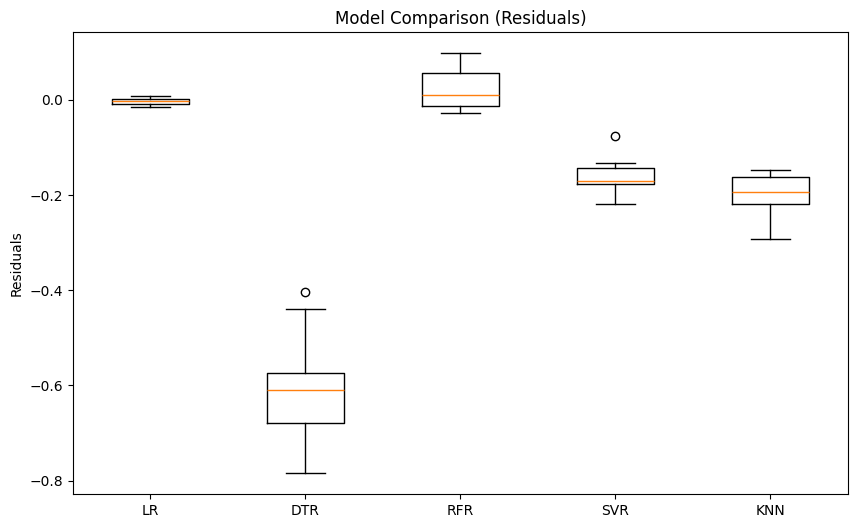




Best Model: RandomForestRegressor 


In [24]:
import matplotlib.pyplot as plt

# Unpack MSE, MAE, and residuals from results
mse_values = [-mse for mse, _, _ in results]  # Negate to get positive MSE values
mae_values = [mae for _, mae, _ in results]
residuals_values = [residuals for _, _, residuals in results]

# Plot MSE Boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(mse_values, labels=names)
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()
print()
print()
# Plot MAE Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(mae_values, labels=names)
plt.title('Model Comparison (MAE)')
plt.ylabel('Mean Absolute Error')
plt.show()
print()
print()
# Plot Residuals Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(residuals_values, labels=names)
plt.title('Model Comparison (Residuals)')
plt.ylabel('Residuals')
plt.show()
print()
print()

print(f"\nBest Model: {best_model.__class__.__name__} ")

**NOTE:**

Since none of the above algorithms have given us a positive residual score, it means none of them are providing accurate results. Hence, we switch to train our model on some additional algorithms.


DTR:
  MSE = 212291049214.7937
  MAE = 299380.1522
  R² = -0.2934

RFR:
  MSE = 162290822572.6760
  MAE = 329176.1979
  R² = 0.0112

GBR:
  MSE = 156222950984.3005
  MAE = 330966.3408
  R² = 0.0482

XGB:
  MSE = 163755325629.4752
  MAE = 320356.3747
  R² = 0.0023

SVR:
  MSE = 186960641666.7153
  MAE = 318213.7348
  R² = -0.1391

KNN:
  MSE = 202609509610.2074
  MAE = 370135.9870
  R² = -0.2344


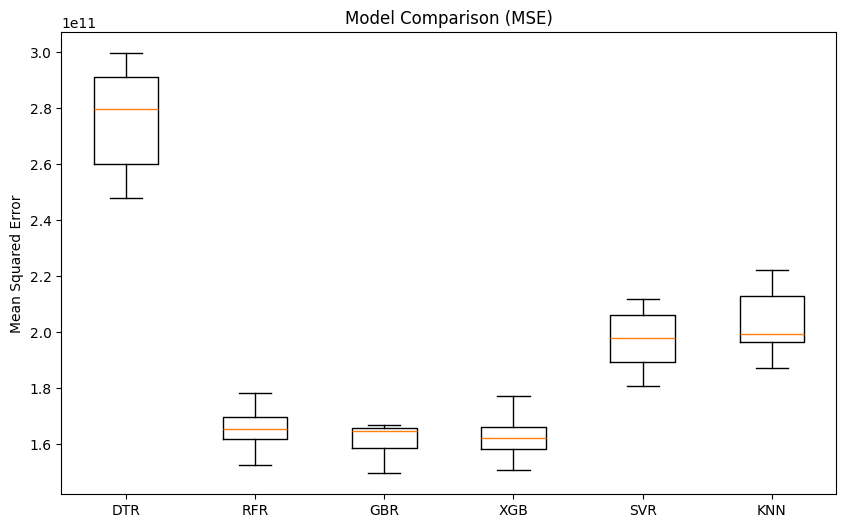


Best Model: GradientBoostingRegressor with R² = 0.0482


In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# List of new models for evaluation
models = []
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))

results = []
names = []
metrics = {
    'MSE': [], 'MAE': [], 'R²': []
}
best_model = None
best_r2 = -np.inf

kf = KFold(n_splits=10, random_state=42, shuffle=True)

for name, model in models:
    mse_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='neg_mean_squared_error')
    mae_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='neg_mean_absolute_error')
    r2_cv = cross_val_score(model, X_train_scaled_df, y_train, cv=kf, scoring='r2')

    results.append((mse_cv, mae_cv, r2_cv))
    names.append(name)

    model.fit(X_train_scaled_df, y_train)
    y_pred = model.predict(X_val_scaled_df)

    # Calculate metrics
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"\n{name}:")
    print(f"  MSE = {mse:.4f}")
    print(f"  MAE = {mae:.4f}")
    print(f"  R² = {r2:.4f}")

    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['R²'].append(r2)

    if r2 > best_r2:
        best_r2 = r2
        best_model = model


plt.figure(figsize=(10, 6))


plt.boxplot([(-mse) for mse, _, _ in results], labels=names)
plt.title('Model Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.show()


print(f"\nBest Model: {best_model.__class__.__name__} with R² = {best_r2:.4f}")


Graphical representation of the Mean squared error, mean absolute error and the residual

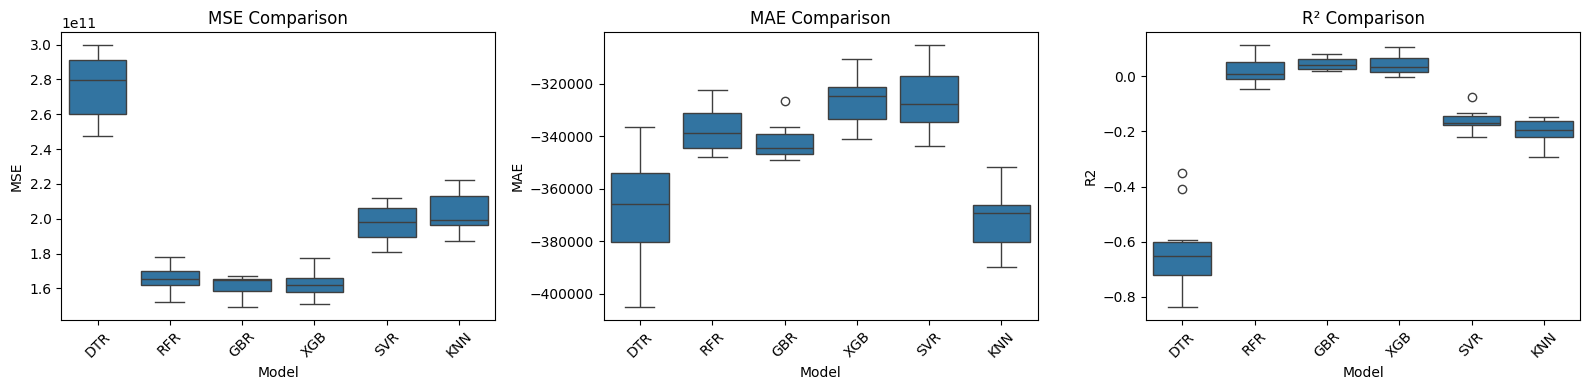

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'R2': []
}

# Flatten the metrics for each model into the data dictionary
for name, (mse_values, mae_values, r2_values) in zip(names, results):
    for mse, mae, r2 in zip(mse_values, mae_values, r2_values):
        data['Model'].append(name)
        data['MSE'].append(-mse)
        data['MAE'].append(mae)
        data['R2'].append(r2)


metrics_df = pd.DataFrame(data)

plt.figure(figsize=(16, 4))

# Boxplot for MSE
plt.subplot(1, 3, 1)
sns.boxplot(x='Model', y='MSE', data=metrics_df)
plt.title('MSE Comparison')
plt.xticks(rotation=45)

# Boxplot for MAE
plt.subplot(1, 3, 2)
sns.boxplot(x='Model', y='MAE', data=metrics_df)
plt.title('MAE Comparison')
plt.xticks(rotation=45)

# Boxplot for R²
plt.subplot(1, 3, 3)
sns.boxplot(x='Model', y='R2', data=metrics_df)
plt.title('R² Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:

print(f"\nBest Model: {best_model.__class__.__name__} ")


Best Model: GradientBoostingRegressor 


**STEP 6. CLUSTER MEANS AND SILHOUTTE SCORE**

1.   Optimal number of clusters
2.   Silhoutte score


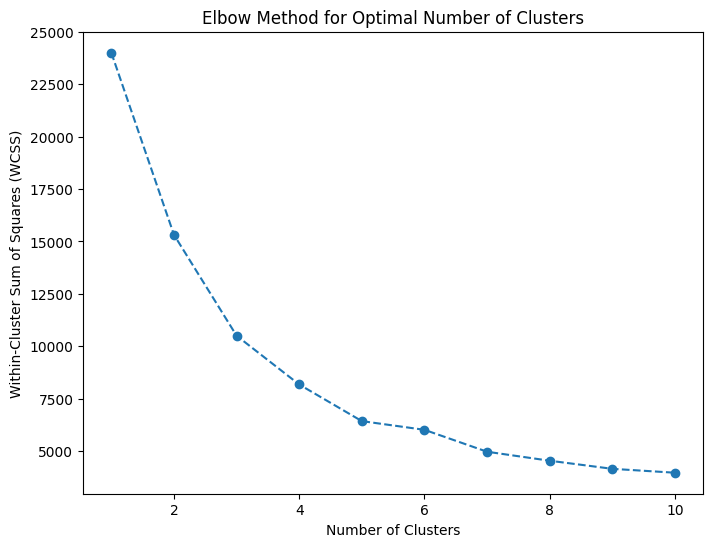

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
num_clusters = range(1, 11)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled_df)  # Use your data here
    wcss.append(kmeans.inertia_)

# Plot WCSS for Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [29]:
from sklearn.metrics import silhouette_score

# Choose a specific number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled_df)

silhouette_avg = silhouette_score(X_train_scaled_df, cluster_labels)
print(f"Silhouette Score for 3 clusters: {silhouette_avg:.4f}")


Silhouette Score for 3 clusters: 0.3845


**STEP 6. BEST MODEL FOR PREDICTION**

1.   Optimal number of clusters
2.   Silhoutte score
3.   Checking the maximum and minimum range for our input
4.   Submitting a test data (input) and predicting the total yield based off our best model
5.   Saving our best model into the google drive folder



In [30]:
print("Features (Column Names):")
print(X_train_scaled_df.columns.tolist())

# Display data types
print("\nData Types:")
print(X_train_scaled_df.dtypes)
# Assuming X_train_scaled_df is your training DataFrame
min_values = X_train_scaled_df.min()
max_values = X_train_scaled_df.max()

# Combine results into a single DataFrame for better readability
min_max_values = pd.DataFrame({'Min Value': min_values, 'Max Value': max_values})
print(min_max_values)


Features (Column Names):
['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

Data Types:
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object
                     Min Value  Max Value
DC_POWER             -0.758402   2.854918
AC_POWER             -0.759110   2.846417
DAILY_YIELD          -1.073856   1.768117
AMBIENT_TEMPERATURE  -1.556308   3.007096
MODULE_TEMPERATURE   -1.052736   2.847221
IRRADIATION          -0.749759   3.294453


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

best_model = GradientBoostingRegressor()
best_model.fit(X_train_scaled_df, y_train)

# Sample test set based on the feature names (using a DataFrame)
sample_test_data = pd.DataFrame({
    'DC_POWER': [500.0, 600.0, 550.0],  # Example values
    'AC_POWER': [480.0, 580.0, 520.0],
    'DAILY_YIELD': [300.0, 350.0, 320.0],
    'AMBIENT_TEMPERATURE': [25.0, 26.0, 27.0],
    'MODULE_TEMPERATURE': [40.0, 42.0, 41.0],
    'IRRADIATION': [1000.0, 900.0, 950.0]
})

# Scale the new data (using the same scaler you used for training)
sample_test_data_scaled = scaler.transform(sample_test_data)

# Ensure the best model is trained and then make predictions
try:
    predictions = best_model.predict(sample_test_data_scaled)
    # Print the predictions
    for i, prediction in enumerate(predictions):
        print(f"Prediction for test sample {i+1}: {prediction:.2f} (Predicted TOTAL_YIELD)")
except Exception as e:
    print(f"Error during prediction: {e}")


Prediction for test sample 1: 7182199.15 (Predicted TOTAL_YIELD)
Prediction for test sample 2: 7182199.15 (Predicted TOTAL_YIELD)
Prediction for test sample 3: 7219920.60 (Predicted TOTAL_YIELD)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [33]:
import joblib

# Assuming 'models' contains a list of models and their corresponding scores
# Placeholder for demonstration (replace with your actual model selection process)
models = [  # Sample models data
    (('model1_params'), GradientBoostingRegressor(), 0.85),  # Example model with params and score
    (('model2_params'), GradientBoostingRegressor(), 0.92),  # Example model with params and score
]

# Find the best model based on the scores (assuming higher score is better)
best_index = max(range(len(models)), key=lambda i: models[i][2])

best_model = models[best_index][1]  # Getting the best model
best_model.fit(X_train_scaled_df, y_train)  # Fitting the best model to the training data

# Path to save the model (including the filename)
model_path = '/content/drive/My Drive/assignment/best_model.sav'  # Adjusted path with filename

# Export the trained model using joblib
joblib.dump(best_model, model_path)  # Save the model
print(f"Best model saved to: {model_path}")

Best model saved to: /content/drive/My Drive/assignment/best_model.sav


***STEP 7. VISUALIZATION FOR DIMENSIONAL ANALYSIS ***


1.   Applying PDA algorithm
2.   Applying LDA algorithm
3.   Applying ICA algorithm



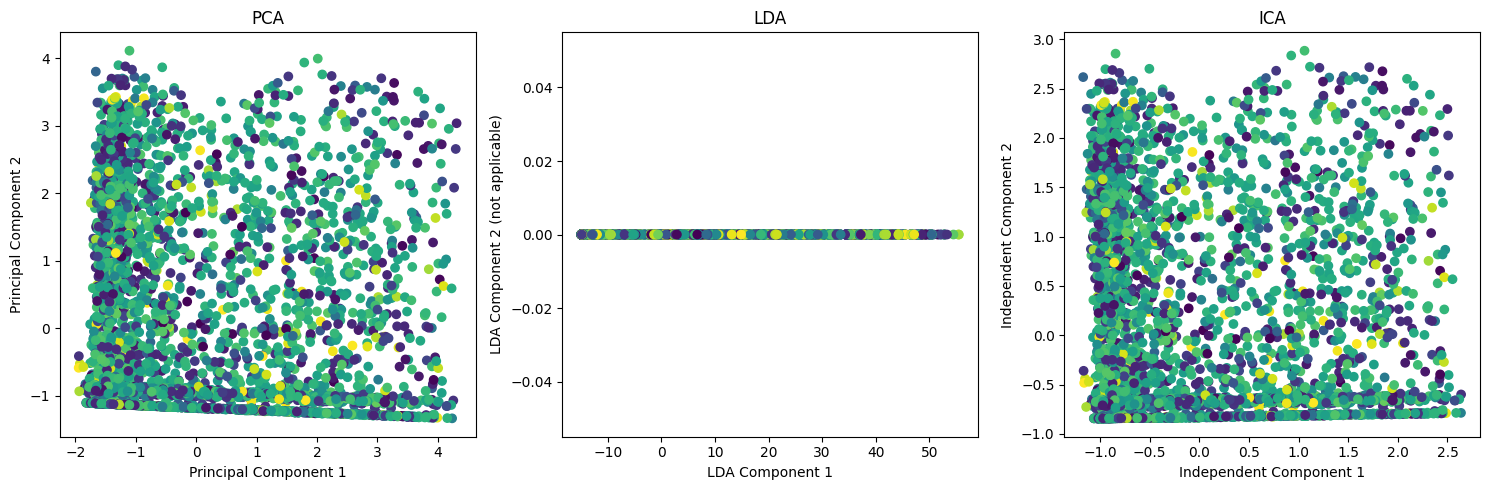

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming X_train_scaled_df and y_train are already defined

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled_df)

# ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_train_scaled_df)

# LDA (adjusting n_components to 1)
# Convert y_train to categorical using LabelEncoder if it's continuous
if y_train.dtype in [np.float64, np.float32, np.int64, np.int32]: # Check if y_train is numerical
    le = LabelEncoder()
    y_train_categorical = le.fit_transform(y_train) # Convert to categorical labels
else:
    y_train_categorical = y_train  # If already categorical, no need to transform

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train_scaled_df, y_train_categorical) # Use the categorical labels

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# PCA plot
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
ax[0].set_title('PCA')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# LDA plot (Use 0 for the y-axis since LDA only gives one component)
ax[1].scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y_train_categorical, cmap='viridis') # Use categorical labels for plotting
ax[1].set_title('LDA')
ax[1].set_xlabel('LDA Component 1')
ax[1].set_ylabel('LDA Component 2 (not applicable)')

# ICA plot
ax[2].scatter(X_ica[:, 0], X_ica[:, 1], c=y_train, cmap='viridis')
ax[2].set_title('ICA')
ax[2].set_xlabel('Independent Component 1')
ax[2].set_ylabel('Independent Component 2')

plt.tight_layout()
plt.show()

# EXPLAINABLE AI


**Step 8. Understanding our model with the help of Explainable AI models**


1.   SHAP
2.   LIME



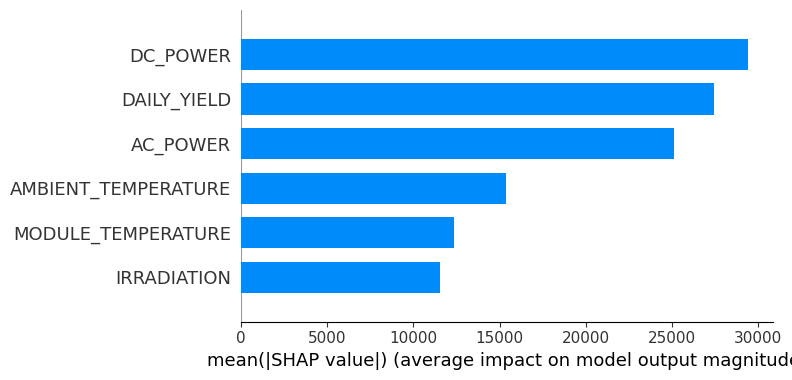

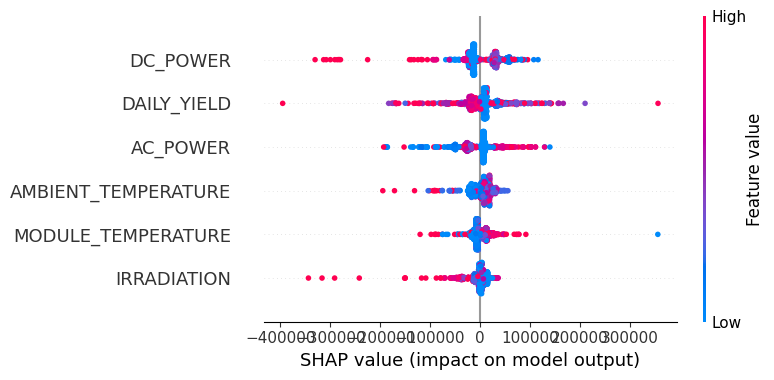

In [35]:
import shap

# Assuming `best_model` is your trained model and `X_train_scaled_df`, `X_val_scaled_df` are your training and validation data
explainer = shap.Explainer(best_model, X_train_scaled_df)
shap_values = explainer(X_val_scaled_df)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_val_scaled_df, plot_type="bar")
shap.summary_plot(shap_values, X_val_scaled_df)


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

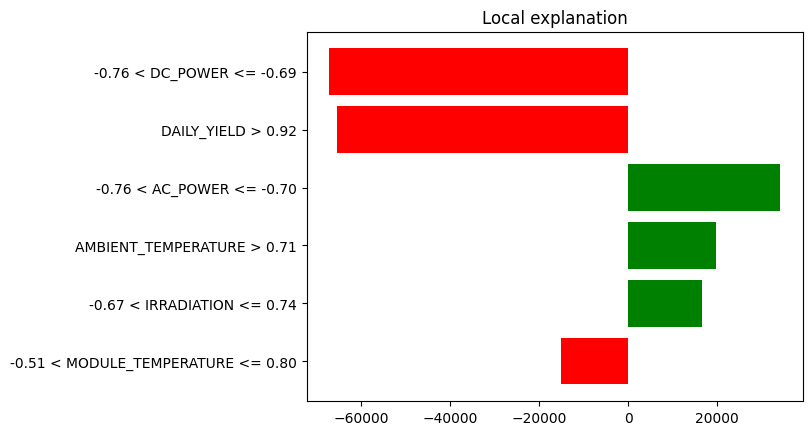

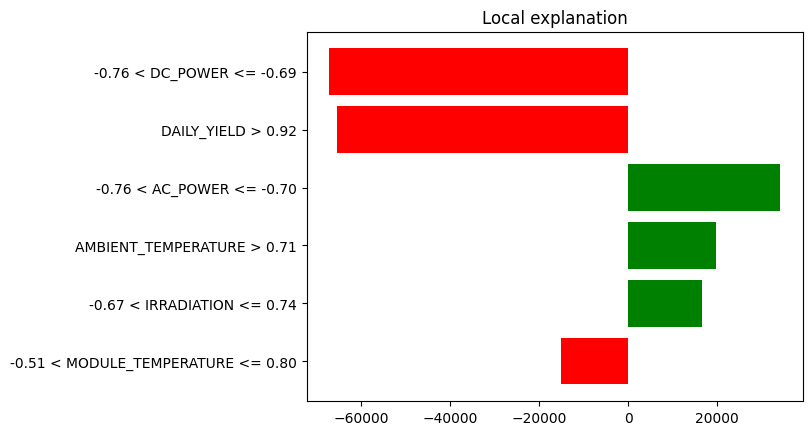

In [40]:
# Import necessary libraries
import lime
from lime.lime_tabular import LimeTabularExplainer
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  # Import Gradient Boosting Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train Gradient Boosting Regressor
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled_df, y_train)

# Get feature names from the DataFrame
feature_names = X_train_scaled_df.columns.tolist()  # Extract column names

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_scaled_df.values,
    feature_names=feature_names,  # Use the extracted feature names
    mode="regression",
    discretize_continuous=True,
)

# Wrapper for the prediction function to ensure it returns output in the right format
def predict_wrapper(data):
    return best_model.predict(data).flatten()

# Explain a specific instance (e.g., the first instance in the validation set)
i = 0
explanation = explainer.explain_instance(
    X_val_scaled_df.iloc[i],           # Instance to explain
    predict_wrapper                     # Wrapped prediction function
)

# Display the explanation
explanation.show_in_notebook(show_table=True)
explanation.as_pyplot_figure()  # Optionally, plot the explanation as a figure